In [70]:
import pandas as pd

# Load the movie dataset
movie_df = pd.read_csv(r"TMDB 10000 Movies Dataset.csv")

# Check for missing values
print(movie_df.isnull().sum())

movie_df['release_date'] = pd.to_datetime(movie_df['release_date'], format='%Y-%m-%d').dt.year.astype(float)


# Impute missing values in the 'overview' column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(movie_df[['overview']])
movie_df['overview'] = imputer.transform(movie_df[['overview']])

# Transform the 'original_language' column using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(movie_df['original_language'])
movie_df['original_language'] = le.transform(movie_df['original_language'])

# Transform the 'popularity' column using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(movie_df[['popularity']])
movie_df['popularity'] = scaler.transform(movie_df[['popularity']])

# Extract the release year from the 'release_date' column
movie_df['release_year'] = pd.DatetimeIndex(movie_df['release_date']).year

# Print the preprocessed dataset
movie_df.head(10)


id                   0
original_language    0
original_title       0
overview             6
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count,release_year
0,851644,24,20세기 소녀,Yeon-du asks her best friend Bora to collect a...,0.018598,2022.0,20th Century Girl,8.7,290,1970
1,238,9,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",0.009403,1972.0,The Godfather,8.7,16988,1970
2,278,9,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,0.009202,1994.0,The Shawshank Redemption,8.7,22748,1970
3,240,9,The Godfather Part II,In the continuing saga of the Corleone crime f...,0.004854,1974.0,The Godfather Part II,8.6,10293,1970
4,667257,10,Cosas imposibles,"Matilde is a woman who, after the death of her...",0.003530,2021.0,Impossible Things,8.6,299,1970
5,19404,17,दिलवाले दुल्हनिया ले जायेंगे,"Raj is a rich, carefree, happy-go-lucky second...",0.002485,1995.0,Dilwale Dulhania Le Jayenge,8.6,3961,1970
6,424,9,Schindler's List,The true story of how businessman Oskar Schind...,0.005639,1993.0,Schindler's List,8.6,13486,1970
7,620249,43,罗小黑战记,"In the bustling human world, spirits live peac...",0.001927,2019.0,The Legend of Hei,8.6,215,1970
8,372754,22,同級生,"Rihito Sajo, an honor student with a perfect s...",0.001170,2016.0,Dou kyu sei – Classmates,8.5,263,1970
9,129,22,千と千尋の神隠し,"A young girl, Chihiro, becomes trapped in a st...",0.007042,2001.0,Spirited Away,8.5,13595,1970


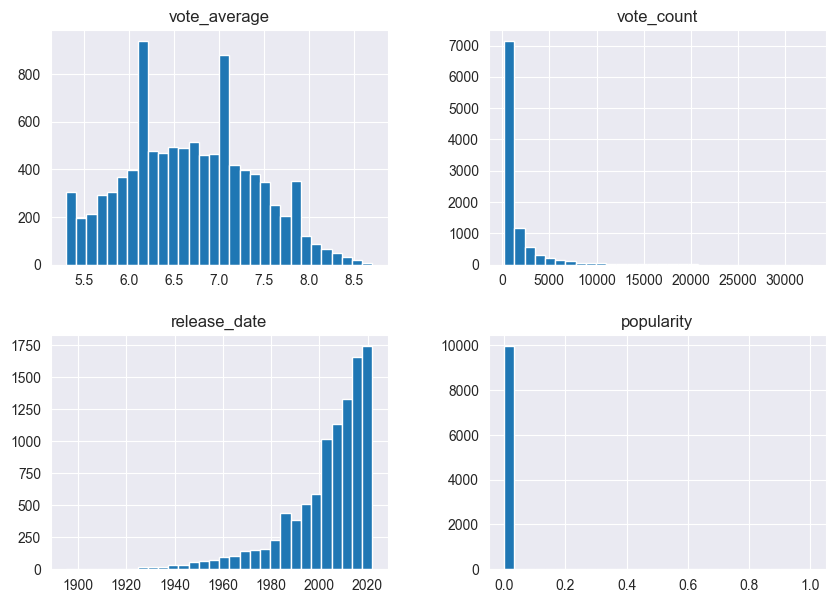

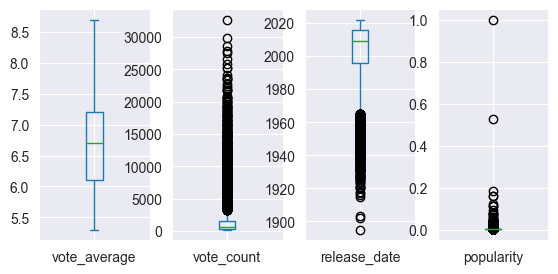

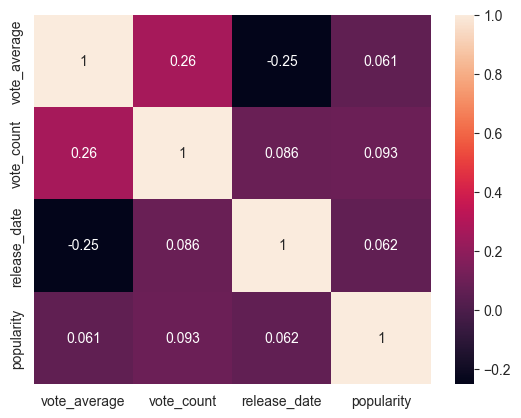

,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count,release_year
0,851644,24,20세기 소녀,Yeon-du asks her best friend Bora to collect a...,0.018598,2022.0,20th Century Girl,8.7,290,1970
1,238,9,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",0.009403,1972.0,The Godfather,8.7,16988,1970
2,278,9,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,0.009202,1994.0,The Shawshank Redemption,8.7,22748,1970
3,240,9,The Godfather Part II,In the continuing saga of the Corleone crime f...,0.004854,1974.0,The Godfather Part II,8.6,10293,1970
4,667257,10,Cosas imposibles,"Matilde is a woman who, after the death of her...",0.003530,2021.0,Impossible Things,8.6,299,1970
...,...,...,...,...,...,...,...,...,...,...
9995,11375,9,Hollywood Homicide,"Joe Gavilan and his new partner K. C. Calden, ...",0.000978,2003.0,Hollywood Homicide,5.3,529,1970
9996,298614,15,Une heure de tranquillité,"Michel, who's crazy about jazz, has just found...",0.000573,2014.0,Do Not Disturb,5.3,304,1970
9997,50357,9,Apollo 18,"Officially, Apollo 17 was the last manned miss...",0.005561,2011.0,Apollo 18,5.3,839,1970
9998,97795,9,Emergo,A team of parapsychologists sets out to invest...,0.000616,2011.0,Apartment 143,5.3,242,1970


In [71]:
#eda
# Plot histograms of numerical features
numerical_features = ['vote_average', 'vote_count', 'release_date', 'popularity']
movie_df[numerical_features].hist(bins=30, figsize=(10,7))
plt.show()

# Plot box plots of numerical features
movie_df[numerical_features].plot(kind='box', subplots=True, layout=(1,6), sharex=False, sharey=False, figsize=(10,3))
plt.show()

# Calculate the correlation matrix of the numerical features
corr_matrix = movie_df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Select features with a correlation coefficient greater than 0.1 with the target variable
threshold = 0.1
important_features = corr_matrix[corr_matrix['vote_average'] > threshold].index
movies_df = movie_df[important_features]
movie_df


In [72]:
# Rename the 'release_year' column to 'release_date'
movie_df.rename(columns={'release_year':'release_date'}, inplace=True)

# Display the first 5 rows of the updated DataFrame
print(movie_df.head(10))
movie_df

       id  original_language                original_title  \
0  851644                 24                       20세기 소녀   
1     238                  9                 The Godfather   
2     278                  9      The Shawshank Redemption   
3     240                  9         The Godfather Part II   
4  667257                 10              Cosas imposibles   
5   19404                 17  दिलवाले दुल्हनिया ले जायेंगे   
6     424                  9              Schindler's List   
7  620249                 43                         罗小黑战记   
8  372754                 22                           同級生   
9     129                 22                      千と千尋の神隠し   

                                            overview  popularity  \
0  Yeon-du asks her best friend Bora to collect a...    0.018598   
1  Spanning the years 1945 to 1955, a chronicle o...    0.009403   
2  Framed in the 1940s for the double murder of h...    0.009202   
3  In the continuing saga of the Corleone cri

,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count,release_date
0,851644,24,20세기 소녀,Yeon-du asks her best friend Bora to collect a...,0.018598,2022.0,20th Century Girl,8.7,290,1970
1,238,9,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",0.009403,1972.0,The Godfather,8.7,16988,1970
2,278,9,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,0.009202,1994.0,The Shawshank Redemption,8.7,22748,1970
3,240,9,The Godfather Part II,In the continuing saga of the Corleone crime f...,0.004854,1974.0,The Godfather Part II,8.6,10293,1970
4,667257,10,Cosas imposibles,"Matilde is a woman who, after the death of her...",0.003530,2021.0,Impossible Things,8.6,299,1970
...,...,...,...,...,...,...,...,...,...,...
9995,11375,9,Hollywood Homicide,"Joe Gavilan and his new partner K. C. Calden, ...",0.000978,2003.0,Hollywood Homicide,5.3,529,1970
9996,298614,15,Une heure de tranquillité,"Michel, who's crazy about jazz, has just found...",0.000573,2014.0,Do Not Disturb,5.3,304,1970
9997,50357,9,Apollo 18,"Officially, Apollo 17 was the last manned miss...",0.005561,2011.0,Apollo 18,5.3,839,1970
9998,97795,9,Emergo,A team of parapsychologists sets out to invest...,0.000616,2011.0,Apartment 143,5.3,242,1970


using cosine similarity

In [73]:
# Create a matrix of movies with genre and release year as features
matrix = movie_df.pivot_table(index='title', values='popularity')

# Fill the NaN values with 0
matrix.fillna(0, inplace=True)

# Convert the matrix into a dense numpy array
matrix = matrix.values


In [74]:
# Import the cosine_similarity function
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between all movies
cosine_similarity = cosine_similarity(matrix)


In [75]:
# Create a function that takes a movie title as input and returns the top 10 similar movies
def recommend_movies(title, cosine_similarity=cosine_similarity):
    # Get the index of the movie from the movie_df DataFrame
    movie_index = movie_df[movie_df['original_title'] == title].index[0]

    # Get the cosine similarity scores for the movie
    scores = list(enumerate(cosine_similarity[movie_index]))

    # Sort the scores in descending order
    scores = sorted(scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 scores
    scores = scores[1:11]

    # Get the movie indices from the scores
    movie_indices = [i[0] for i in scores]

    # Return the top 10 similar movies
    return movie_df['original_title'].iloc[movie_indices]



In [84]:
from sklearn.metrics.pairwise import cosine_similarity

def cosine_sim(indices,ratings):
    cosine_sim = cosine_similarity(indices,indices)
    return cosine_sim

indices = pd.Series(movie_df.index, index=movie_df['title'])


def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movie_df['title'].iloc[movie_indices]



In [86]:
# Test the get_recommendation function
movie = 'Inception'
num_recs = 5
recs = get_recommendations(movie)
print("Recommendations for {}:".format(movie))
for i, rec in enumerate(recs):
    print("{}. {} ({})".format(i+1, rec[0], rec[1]))


TypeError: 'function' object is not subscriptable